<a href="https://colab.research.google.com/github/wladimirrodrigues/AnimaisFantasticos/blob/main/imersao_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.express as px

df_principal = pd.read_excel('/content/Imersão Python - Tabela de ações.xlsx' , sheet_name='Principal')
df_principal.head()

,Ativo,Data,Último (R$),Var. Dia (%),Var. Sem. (%),Var. Mês (%),Var. Ano (%),Var. 12M (%),Val. Mín,Val. Máx,...,Var Ano %,Variação %,Valor Inicial (R$),Quantidade de ações,Variação $,Resultado,Nome da Empresa,Segmento,Idade,Cat_idade
0,USIM5,2024-01-26,9.50,5.20,11.76,2.26,2.26,15.97,9.18,9.56,...,0.0226,0.0520,9.030418,515117391,2.418897e+08,Subiu,Usiminas,Siderurgia,59,Entre 50 e 100 anos
1,CMIN3,2024-01-26,6.82,2.40,2.40,-12.11,-12.11,50.56,6.66,6.86,...,-0.1211,0.0240,6.660156,1110559345,1.775160e+08,Subiu,CSN Mineração,Mineração,80,Entre 50 e 100 anos
2,PETR3,2024-01-26,41.96,2.19,7.73,7.64,7.64,77.55,40.81,42.34,...,0.0764,0.0219,41.060769,2379877655,2.140059e+09,Subiu,Petrobras,Energia,69,Entre 50 e 100 anos
3,SUZB3,2024-01-26,52.91,2.04,2.14,-4.89,-4.89,18.85,51.89,53.17,...,-0.0489,0.0204,51.852215,683452836,7.229463e+08,Subiu,Suzano,Papel e Celulose,99,Entre 50 e 100 anos
4,CPFE3,2024-01-26,37.10,2.03,2.49,-3.66,-3.66,20.70,36.37,37.32,...,-0.0366,0.0203,36.361854,187732538,1.385740e+08,Subiu,CPFL Energia,Energia,109,Mais de 100 anos


In [ ]:
df_total_acoes = pd.read_excel('/content/Imersão Python - Tabela de ações.xlsx' , sheet_name='Total_de_acoes')
df_total_acoes.head()

,Código,Qtde. Teórica
0,RRRP3,2.356656e+08
1,ALOS3,5.326166e+08
2,ALPA4,1.767340e+08
3,ABEV3,4.394246e+09
4,ARZZ3,6.230589e+07


In [ ]:
df_Ticker = pd.read_excel('/content/Imersão Python - Tabela de ações.xlsx' , sheet_name='Ticker')
df_Ticker.head()

,Ticker,Nome
0,MGLU3,Magazine Luiza
1,HAPV3,Hapvida
2,PETR4,Petrobras
3,B3SA3,B3
4,USIM5,Usiminas


In [ ]:
df_chatGPT = pd.read_excel('/content/Imersão Python - Tabela de ações.xlsx' , sheet_name='chatGPT')
df_chatGPT.head()

,Nome da Empresa,Segmento,Idade (em anos)
0,Usiminas,Siderurgia,59
1,CSN Mineração,Mineração,80
2,Petrobras,Energia,69
3,Suzano,Papel e Celulose,99
4,CPFL Energia,Energia,109


In [ ]:
df_principal = df_principal[['Ativo',	'Data',	'Último (R$)'	,'Var. Dia (%)']].copy()
df_principal.head()

,Ativo,Data,Último (R$),Var. Dia (%)
0,USIM5,2024-01-26,9.50,5.20
1,CMIN3,2024-01-26,6.82,2.40
2,PETR3,2024-01-26,41.96,2.19
3,SUZB3,2024-01-26,52.91,2.04
4,CPFE3,2024-01-26,37.10,2.03


In [ ]:
df_principal = df_principal.rename(columns={'Último (R$)': 'Valor_final', 'Var. Dia (%)': 'Var_dia_pct'}).copy()
df_principal.head()

,Ativo,Data,Valor_final,Var_dia_pct
0,USIM5,2024-01-26,9.50,5.20
1,CMIN3,2024-01-26,6.82,2.40
2,PETR3,2024-01-26,41.96,2.19
3,SUZB3,2024-01-26,52.91,2.04
4,CPFE3,2024-01-26,37.10,2.03


In [ ]:
df_principal['Variacao_pct'] = df_principal['Var_dia_pct'] / 100
df_principal['Valor_inicial'] = df_principal['Valor_final']/(df_principal['Variacao_pct'] + 1)
df_principal.head()

,Ativo,Data,Valor_final,Var_dia_pct,Variacao_pct,Valor_inicial
0,USIM5,2024-01-26,9.50,5.20,0.0520,9.030418
1,CMIN3,2024-01-26,6.82,2.40,0.0240,6.660156
2,PETR3,2024-01-26,41.96,2.19,0.0219,41.060769
3,SUZB3,2024-01-26,52.91,2.04,0.0204,51.852215
4,CPFE3,2024-01-26,37.10,2.03,0.0203,36.361854


In [ ]:
df_principal = df_principal.merge(df_total_acoes, left_on='Ativo', right_on='Código', how='left')
df_principal.head()

,Ativo,Data,Valor_final,Var_dia_pct,Variacao_pct,Valor_inicial,Código,Qtde. Teórica
0,USIM5,2024-01-26,9.50,5.20,0.0520,9.030418,USIM5,5.151174e+08
1,CMIN3,2024-01-26,6.82,2.40,0.0240,6.660156,CMIN3,1.110559e+09
2,PETR3,2024-01-26,41.96,2.19,0.0219,41.060769,PETR3,2.379878e+09
3,SUZB3,2024-01-26,52.91,2.04,0.0204,51.852215,SUZB3,6.834528e+08
4,CPFE3,2024-01-26,37.10,2.03,0.0203,36.361854,CPFE3,1.877325e+08


In [ ]:
df_principal =  df_principal.drop(columns=['Código'])
df_principal.head()

,Ativo,Data,Valor_final,Var_dia_pct,Variacao_pct,Valor_inicial,Qtde. Teórica
0,USIM5,2024-01-26,9.50,5.20,0.0520,9.030418,5.151174e+08
1,CMIN3,2024-01-26,6.82,2.40,0.0240,6.660156,1.110559e+09
2,PETR3,2024-01-26,41.96,2.19,0.0219,41.060769,2.379878e+09
3,SUZB3,2024-01-26,52.91,2.04,0.0204,51.852215,6.834528e+08
4,CPFE3,2024-01-26,37.10,2.03,0.0203,36.361854,1.877325e+08


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
df_principal['Variacao_Real'] =  (df_principal['Valor_final'] - df_principal['Valor_inicial']) * df_principal['Qtde. Teórica']
df_principal['Qtde. Teórica'] = df_principal['Qtde. Teórica'].astype(int)
df_principal.head()

,Ativo,Data,Valor_final,Var_dia_pct,Variacao_pct,Valor_inicial,Qtde. Teórica,Variacao_Real
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06


In [ ]:
df_principal = df_principal.rename(columns={'Qtde. Teórica': 'Qtd_teorica'}).copy()
df_principal.head()

,Ativo,Data,Valor_final,Var_dia_pct,Variacao_pct,Valor_inicial,Qtd_teorica,Variacao_Real
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06


In [ ]:
df_principal['Resultado'] = df_principal['Variacao_Real'].apply(lambda x: "Subiu" if x > 0 else ("Desceu" if x < 0 else "Estável"))
df_principal.head()

,Ativo,Data,Valor_final,Var_dia_pct,Variacao_pct,Valor_inicial,Qtd_teorica,Variacao_Real,Resultado
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,Subiu
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06,Subiu


In [ ]:
df_principal = df_principal.merge(df_Ticker, left_on='Ativo', right_on='Ticker', how='left')
df_principal = df_principal.drop(columns=['Ticker'])
df_principal.head()

,Ativo,Data,Valor_final,Var_dia_pct,Variacao_pct,Valor_inicial,Qtd_teorica,Variacao_Real,Resultado,Nome
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu,Usiminas
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu,CSN Mineração
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,Subiu,Petrobras
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu,Suzano
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06,Subiu,CPFL Energia


In [ ]:
df_principal = df_principal.merge(df_chatGPT, left_on='Nome', right_on='Nome da Empresa', how='left')
df_principal = df_principal.drop(columns=['Nome da Empresa'])
df_principal = df_principal.rename(columns={'Idade (em anos)': 'Idade_anos'}).copy()
df_principal.head()

,Ativo,Data,Valor_final,Var_dia_pct,Variacao_pct,Valor_inicial,Qtd_teorica,Variacao_Real,Resultado,Nome,Segmento,Idade_anos
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu,Usiminas,Siderurgia,59
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu,CSN Mineração,Mineração,80
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,Subiu,Petrobras,Energia,69
3,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,Subiu,Petrobras,Energia,69
4,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu,Suzano,Papel e Celulose,99


In [ ]:
def classificar_idade(anos):
    if anos >= 100:
        return "Mais de 100 anos"
    elif anos <= 50:
        return "Menos de 50 anos"
    else:
        return "Entre 50 e 100 anos"

# Aplique a função a cada linha da série 'Idade_anos' usando apply()
df_principal['Cat_idade'] = df_principal['Idade_anos'].apply(lambda x: classificar_idade(x))

df_principal.head()

,Ativo,Data,Valor_final,Var_dia_pct,Variacao_pct,Valor_inicial,Qtd_teorica,Variacao_Real,Resultado,Nome,Segmento,Idade_anos,Cat_idade
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu,Usiminas,Siderurgia,59,Entre 50 e 100 anos
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu,CSN Mineração,Mineração,80,Entre 50 e 100 anos
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,Subiu,Petrobras,Energia,69,Entre 50 e 100 anos
3,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,Subiu,Petrobras,Energia,69,Entre 50 e 100 anos
4,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu,Suzano,Papel e Celulose,99,Entre 50 e 100 anos


In [ ]:
maior = df_principal['Variacao_Real'].max()

# Calculando o menor valor
menor = df_principal['Variacao_Real'].min()

# Calculando a média
media = df_principal['Variacao_Real'].mean()

# Calculando a média de quem subiu
media_subiu = df_principal[df_principal['Resultado'] == 'Subiu']['Variacao_Real'].mean()

# Calculando a média de quem desceu
media_desceu = df_principal[df_principal['Resultado'] == 'Desceu']['Variacao_Real'].mean()

# Exibindo os resultados
print("Maior:", maior)
print("Menor:", menor)
print("Média:", media)
print("Média de quem subiu:", media_subiu)
print("Média de quem desceu:", media_desceu)

Maior: 4762926995.24809
Menor: -1807432634.4595425
Média: 224380755.82612
Média de quem subiu: 542661362.932246
Média de quem desceu: -181109141.75186712


In [ ]:
df_principal_subiu = media_subiu = df_principal[df_principal['Resultado'] == 'Subiu']
df_principal_subiu.head()

,Ativo,Data,Valor_final,Var_dia_pct,Variacao_pct,Valor_inicial,Qtd_teorica,Variacao_Real,Resultado,Nome,Segmento,Idade_anos,Cat_idade
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu,Usiminas,Siderurgia,59,Entre 50 e 100 anos
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu,CSN Mineração,Mineração,80,Entre 50 e 100 anos
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,Subiu,Petrobras,Energia,69,Entre 50 e 100 anos
3,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,Subiu,Petrobras,Energia,69,Entre 50 e 100 anos
4,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu,Suzano,Papel e Celulose,99,Entre 50 e 100 anos


In [ ]:
df_analise_segmento = df_principal_subiu.groupby('Segmento')['Variacao_Real'].sum().reset_index()
df_analise_segmento.head()

,Segmento,Variacao_Real
0,Alimentos,407833683.09
1,Banco,3740512018.78
2,Construção,37525872.38
3,Educação,72295838.99
4,Energia,12175669363.23


In [ ]:
# Criar o gráfico de pizza
fig = px.pie(df_analise_segmento, values='Variacao_Real', names='Segmento', title='Análise de Variação Real por Segmento')

# Mostrar o gráfico
fig.show()

In [ ]:
df_analise_saldo = df_principal.groupby('Resultado')['Variacao_Real'].sum().reset_index()
df_analise_saldo.head()

,Resultado,Variacao_Real
0,Desceu,-6338819961.32
1,Estável,0.00
2,Subiu,24962422694.88


In [ ]:


# Função para formatar o valor em Reais
def formatar_reais(valor):
    return 'R$ {:,.2f}'.format(valor)

# Criar uma nova coluna com os valores formatados em Reais
df_analise_saldo['Variacao_Real_Formatado'] = df_analise_saldo['Variacao_Real'].map(formatar_reais)

# Criar o gráfico de barras
fig = px.bar(df_analise_saldo, x='Resultado', y='Variacao_Real', text='Variacao_Real_Formatado', title='Análise de Variação Real por Resultado',
             labels={'Resultado': 'Resultado', 'Variacao_Real': 'Variação Real'})

# Reduzir o tamanho do gráfico
fig.update_layout(width=800, height=500)

# Mostrar o gráfico
fig.show()


In [ ]:
df_analise_faixaEtaria = df_principal.groupby('Cat_idade')['Variacao_Real'].sum().reset_index()
df_analise_faixaEtaria.head()

,Cat_idade,Variacao_Real
0,Entre 50 e 100 anos,17397544304.10
1,Mais de 100 anos,971377356.50
2,Menos de 50 anos,254681072.97


In [ ]:
dados_novo = {
    'Análise por faixa etária': df_analise_faixaEtaria['Cat_idade'],
    'Variação $': df_analise_faixaEtaria['Variacao_Real'].apply(lambda x: f'R$ {x:,.2f}'),
    'Qta_Empresas': [35, 6, 40]  # Aqui você pode substituir pela contagem real, se tiver essa informação no df_analise_faixaEtaria
}

# Criar DataFrame novo
df_novo = pd.DataFrame(dados_novo)

# Exibir DataFrame
df_novo

,Análise por faixa etária,Variação $,Qta_Empresas
0,Entre 50 e 100 anos,"R$ 17,397,544,304.10",35
1,Mais de 100 anos,"R$ 971,377,356.50",6
2,Menos de 50 anos,"R$ 254,681,072.97",40


In [ ]:
fig = px.bar(df_novo, x='Análise por faixa etária', y='Qta_Empresas', text='Variação $', title='Análise por Faixa Etária',
             labels={'Análise por faixa etária': 'Faixa Etária', 'Qta_Empresas': 'Quantidade de Empresas', 'Variação $': 'Variação $'})

fig.update_layout(width=800, height=500)
# Mostrar o gráfico
fig.show()

Criando gráficos de Candlestick com Matplotlib

In [ ]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.5 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
dados = yf.download('PETR4.SA', start="2023-01-01", end="2023-12-31")
dados.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,23.54,23.81,22.80,22.92,17.71,78424700
2023-01-03,22.94,23.10,22.13,22.34,17.26,96750300
2023-01-04,21.96,23.59,21.83,23.05,17.81,129504000
2023-01-05,23.34,24.04,23.15,23.88,18.45,73886000
2023-01-06,23.94,24.32,23.55,23.74,18.34,51851500


In [ ]:
dados.columns
dados = dados.rename(columns={
    'Open': 'Abertura',
    'High': 'Maximo',
    'Low': 'Minimo',
    'Close': 'Fechamento',
    'Adj Close': 'Fech_Ajustado',
    'Volume': 'Volume'})
dados = dados.rename_axis('Data')
dados.head()

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajustado,Volume
Data,,,,,,
2023-01-02,23.54,23.81,22.80,22.92,17.71,78424700
2023-01-03,22.94,23.10,22.13,22.34,17.26,96750300
2023-01-04,21.96,23.59,21.83,23.05,17.81,129504000
2023-01-05,23.34,24.04,23.15,23.88,18.45,73886000
2023-01-06,23.94,24.32,23.55,23.74,18.34,51851500


In [ ]:
df = dados.head(60).copy()
# Convertendo o index em uma coluna de data
df['Data'] = df.index

#Convertendo as datas para o formato numero de matplotlib
#isso é necessario para que o matplotlib possar plotar aas datas correntamente no grafico
df['Data'] = df['Data'].apply(mdates.date2num)

df.head()

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajustado,Volume,Data
Data,,,,,,,
2023-01-02,23.54,23.81,22.80,22.92,17.71,78424700,19359.00
2023-01-03,22.94,23.10,22.13,22.34,17.26,96750300,19360.00
2023-01-04,21.96,23.59,21.83,23.05,17.81,129504000,19361.00
2023-01-05,23.34,24.04,23.15,23.88,18.45,73886000,19362.00
2023-01-06,23.94,24.32,23.55,23.74,18.34,51851500,19363.00


In [ ]:
dados = yf.download('PETR4.SA', start="2023-01-01", end="2023-12-31")

[*********************100%%**********************]  1 of 1 completed


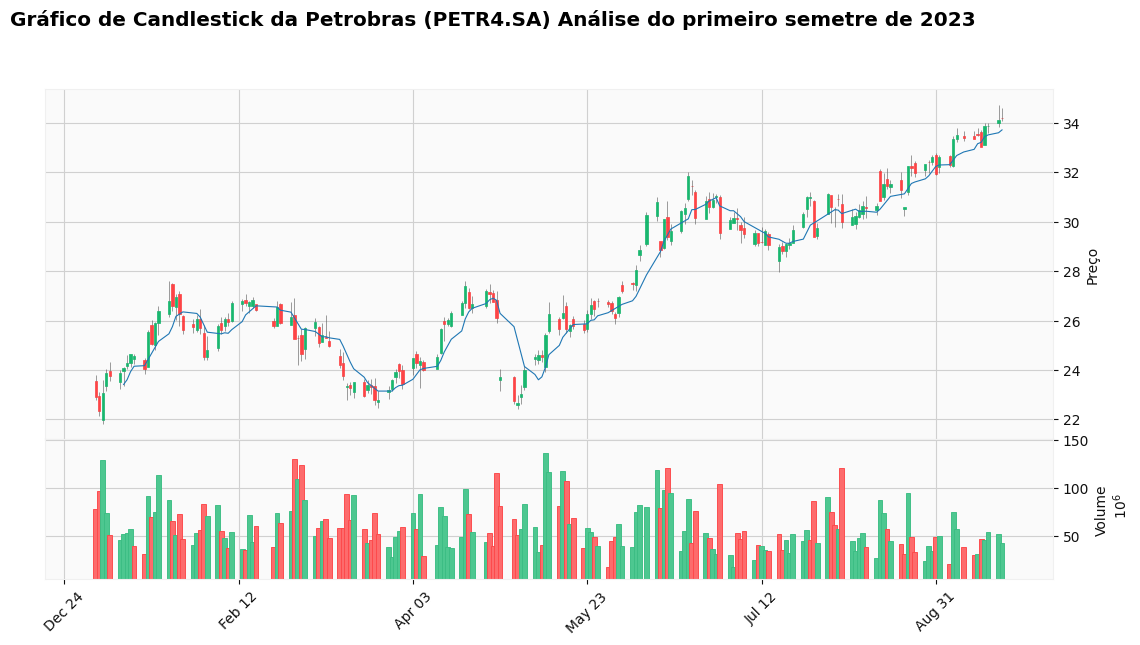

In [ ]:
#mpf.plot(dados.head(50), type='candle', figsize= (14,7), volume=True, mav= (7), style='yahoo')

fig, ax = mpf.plot(dados.head(180), type='candle', figsize=(14, 7), volume=True, mav=(7),
                   title='Gráfico de Candlestick da Petrobras (PETR4.SA) Análise do primeiro semetre de 2023', ylabel='Preço', ylabel_lower='Volume',
                   style='yahoo', show_nontrading=True, returnfig=True)

# Ajustar o espaçamento superior para o título
plt.subplots_adjust(top=0.5)
plt.show()

**B**

**Buscar as açoes da apple**

In [ ]:
dados_Apple = yf.download('AAPL34.SA', start="2024-01-01", end="2024-03-27")

[*********************100%%**********************]  1 of 1 completed


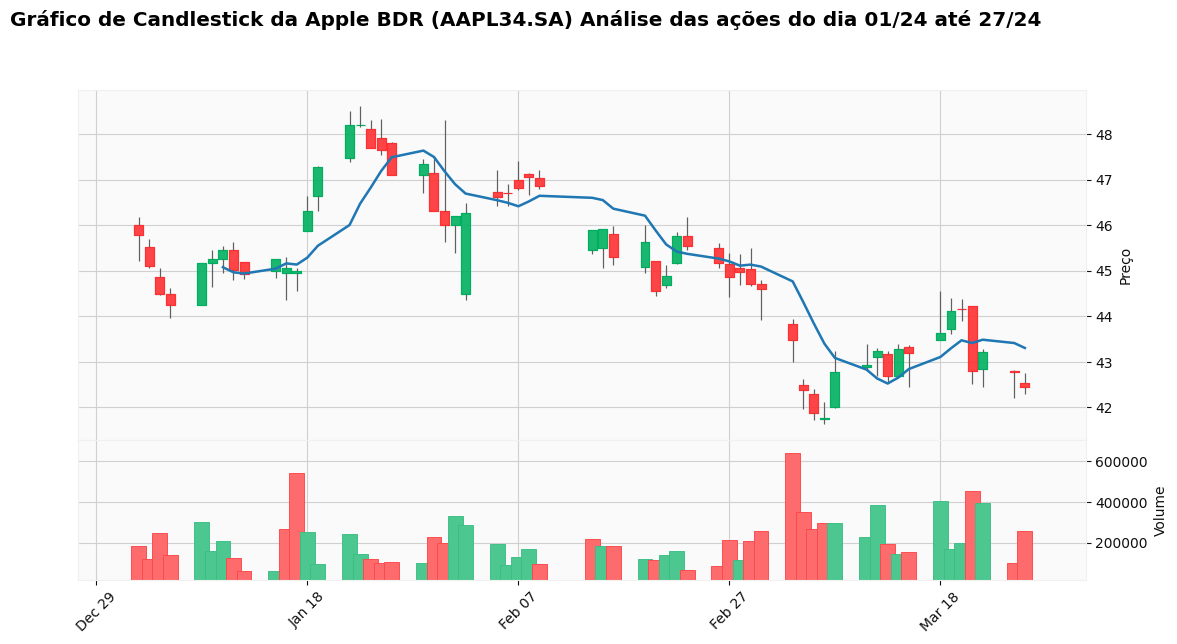

In [ ]:
fig, ax = mpf.plot(dados_Apple.head(87), type='candle', figsize=(14, 7), volume=True, mav=(7),
                   title='Gráfico de Candlestick da Apple BDR (AAPL34.SA) Análise das ações do dia 01/24 até 27/24', ylabel='Preço', ylabel_lower='Volume',
                   style='yahoo', show_nontrading=True, returnfig=True)

# Ajustar o espaçamento superior para o título
plt.subplots_adjust(top=0.5)
plt.show()